In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def guassian_kernel(x, xi, tau):
    return np.exp(np.sum((x - xi) ** 2) / (2 * tau ** 2))

In [6]:
def locally_weighted_regression(x, X, y, tau):
    m = X.shape[0]
    weights = np.array([guassian_kernel(x, X[i], tau) for i in range(m)])
    W = np.diag(weights)
    X_transpose_W = X_T @ w
    theta = np.linear.inv(X_transpose_W @ X) @ X_transpose_W @ y
    return x @ theta
    

In [14]:
np.random.seed(42)
X = np.linspace(0, 2 * np.pi, 100)
y = np.sin(X) + 0.1 * np.random.randn(100)
X_bias = np.c_[np.ones(X.shape), X]
x_test = np.linspace(0, 2 * np.pi, 200)
x_test_bias = np.c_[np.ones(x_test.shape), x_test]
tau = 0.5
y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in x_test_bias])
plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit (tau=[tau])',linewidth=2)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Locally weighted Regression', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

NameError: name 'X_T' is not defined

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.spatial.distance import cdist

In [11]:
df_linear = pd.read_csv("linear_dataset.csv")
df_lwr = pd.read_csv("lwr_dataset.csv")
df_poly = pd.read_csv("polynomial_dataset.csv")

In [12]:
df_linear

,X,Y
0,0.00000,12.292157
1,0.10101,8.503502
2,0.20202,10.542275
3,0.30303,14.631771
4,0.40404,13.814795
...,...,...
95,9.59596,37.907598
96,9.69697,36.122409
97,9.79798,41.751551
98,9.89899,37.077706


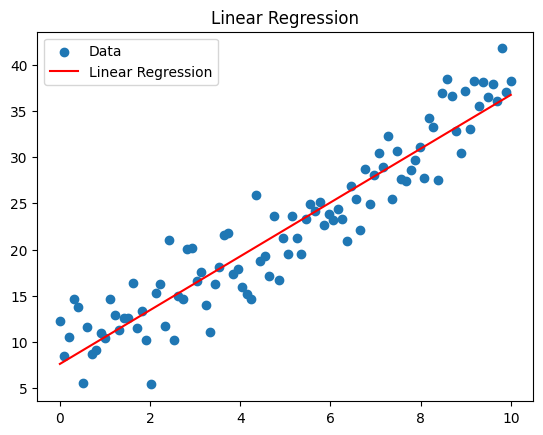

In [13]:
def linear_regression(df):
    X , y = df[['X']], df['Y']
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    plt.scatter(X, y, label ='Data')
    plt.plot(X, y_pred, color='red', label = 'Linear Regression')
    plt.legend()
    plt.title('Linear Regression')
    plt.show()

linear_regression(df_linear)

In [20]:
def guassian_kernel(x, X, tau):
    return np.exp(-cdist([[x]], X, 'sqeuclidean') / (2 * tau ** 2))

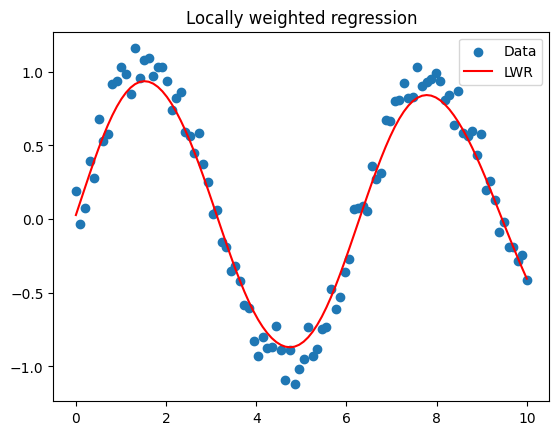

In [21]:
def locally_weighted_regression(X_train, y_train, tau = 0.5):
    X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
    y_pred = []
    for x in X_range:
        x_vec = np.array([1,x])
        weights = guassian_kernel(x, X_train[:, 1:],tau).flatten()
        W = np.diag(weights)
        theta = np.linalg.pinv(X_train.T @ W @ X_train) @ (X_train.T @ W @ y_train)
        y_pred.append(x_vec @ theta)
    plt.scatter(X_train[:, 1], y_train, label = 'Data')
    plt.plot(X_range, y_pred, color = 'red', label = 'LWR')
    plt.legend()
    plt.title("Locally weighted regression")
    plt.show()

locally_weighted_regression(df_lwr[['X']].values, df_lwr['Y'].values)

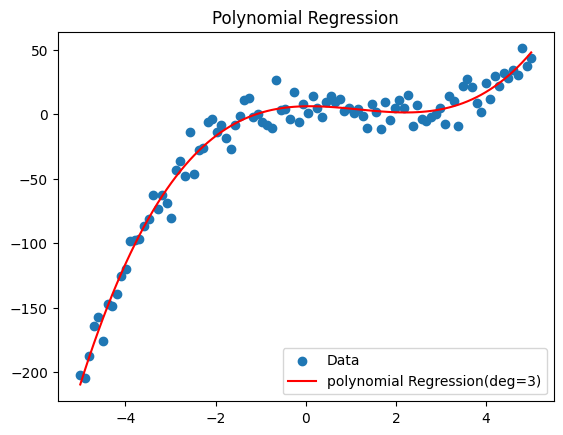

In [23]:
def polynomial_regression(df, degree = 3):
    X, y = df[['X']], df['Y']
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.scatter(X, y, label = 'Data')
    plt.plot(X, y_pred, color = 'red', label = f'polynomial Regression(deg={degree})')
    plt.legend()
    plt.title("Polynomial Regression")
    plt.show()

polynomial_regression(df_poly, degree=3)